<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/CNN/CNN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a simple CNN using tensorflow.
In this tutorial, I used build in famous mnist dataset
built in keras. 
__________________________________________________
<br>
<br>
<font size=2>
Written by: Arjang Fahim<br>
Date: 9-15-2021
Updated: 3-28-2022
</font>

# Step 1: Installation and Setup

In [ ]:
'''
  Colab already installed tensorflow versions 1.x and 2.0,
  GPU and non GPU versions.
  For more information please check
  https://colab.research.google.com/notebooks/tensorflow_version.ipynb
'''

'\n  Colab already installed tensorflow versions 1.x and 2.0,\n  GPU and non GPU versions.\n  For more information please check\n  https://colab.research.google.com/notebooks/tensorflow_version.ipynb\n'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [ ]:
# importing the dataset

from tensorflow.keras.datasets import mnist

In [ ]:
# loading dataset

(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


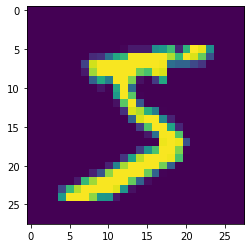

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
y_train.min(), y_train.max()

(0, 9)

In [ ]:
# normalizng the images
# we do this because in practive each feature should be in a similar range so
# that the gradient don't go out of control

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# reshaping the images
# CNN is design for multi dimension data
# here we add a dummy dimension so the data can be fed into
# the model

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
input_shape = x_train[0].shape

In [ ]:
print(input_shape)

(28, 28, 1)


# Step 3: Building the model

In [ ]:
# creating an object (Initializing CNN)

model = tf.keras.models.Sequential()

In [ ]:
# adding first CNN layer (Input layer)
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

# adding second CNN layer 
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# adding flatten layer
model.add(tf.keras.layers.Flatten())

# add fully connected later (Dense layer)
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'] )

# Step 4: Training model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 156s 328ms/step - loss: 0.1674 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.0475 - val_sparse_categorical_accuracy: 0.9852
Epoch 2/10
469/469 [==============================] - 146s 311ms/step - loss: 0.0514 - sparse_categorical_accuracy: 0.9846 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 145s 308ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0296 - val_sparse_categorical_accuracy: 0.9903
Epoch 4/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0298 - val_sparse_categorical_accuracy: 0.9897
Epoch 5/10
469/469 [==============================] - 144s 307ms/step - loss: 0.0213 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.0369 - val_sparse_categorical_accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 144s 308ms/step - loss: 0.

In [ ]:
# model prediction
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

In [ ]:
y_pred[3], y_test[3]

(0, 0)

In [ ]:
y_pred[15], y_test[15]

(5, 5)

In [ ]:
y_pred[3], y_test[3]

(0, 0)

In [ ]:
# confusion matrix
# columns are predicted values
# rows actual values
# diagnal correct prediction

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)



[[ 972    0    1    0    0    1    4    0    1    1]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   2    0 1017    1    3    0    0    7    2    0]
 [   0    0    1 1005    0    2    0    1    1    0]
 [   0    0    0    0  978    0    0    0    1    3]
 [   0    1    1    7    0  878    4    0    1    0]
 [   1    3    0    0    1    1  951    0    1    0]
 [   0    1    5    0    1    0    0 1017    1    3]
 [   1    1    1    0    0    1    0    1  967    2]
 [   0    1    0    2    7    4    0    0    1  994]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9913


# Step 5: Learning Curve

In [ ]:
def learning_curve(history, epoch):
  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])

  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model Accuracy')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

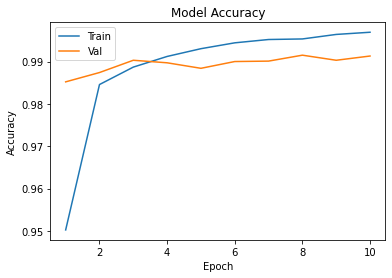

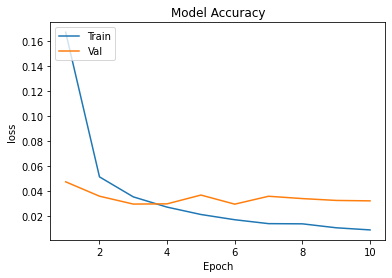

In [ ]:
learning_curve(history, 10)